In [ ]:
import pandas as pd
import numpy as np

community_lda = pd.read_excel("lda2.xlsx").fillna(0)
community_top2vec = pd.read_excel("top2vecliste.xlsx").fillna(0)
community_lda_dic ={}
for i in range(len(community_lda.keys())):
    temp = []
    for c in community_lda[community_lda.keys().tolist()[i]].tolist():
        if c != 0:
            temp.append(c)
    community_lda_dic[i] = temp

community_top2vec_dic ={}
for i in range(len(community_top2vec.keys())):
    temp = []
    for c in community_top2vec[community_top2vec.keys().tolist()[i]].tolist():
        if c != 0:
            temp.append(c)
    community_top2vec_dic[i] = temp


N_confusion = np.zeros((len(community_lda_dic.keys()),len(community_top2vec_dic.keys())))
i=0
j=0
for i in range(len(community_lda_dic.keys())):
    for j in range(len(community_top2vec_dic.keys())):
        N_confusion[i,j] = int(len(list(set(community_lda_dic[i])&set(community_top2vec_dic[j]))))




In [54]:

N_confusion = np.zeros((len(community_lda_dic.keys()), len(community_top2vec_dic.keys())))

for i, lda_community in enumerate(community_lda_dic.keys()):
    for j, top2vec_community in enumerate(community_top2vec_dic.keys()):
        intersection = set(community_lda_dic[lda_community]) & set(community_top2vec_dic[top2vec_community])
        union = set(community_lda_dic[lda_community]) | set(community_top2vec_dic[top2vec_community])
        jaccard_similarity = len(intersection) / len(union)
        N_confusion[i, j] = jaccard_similarity

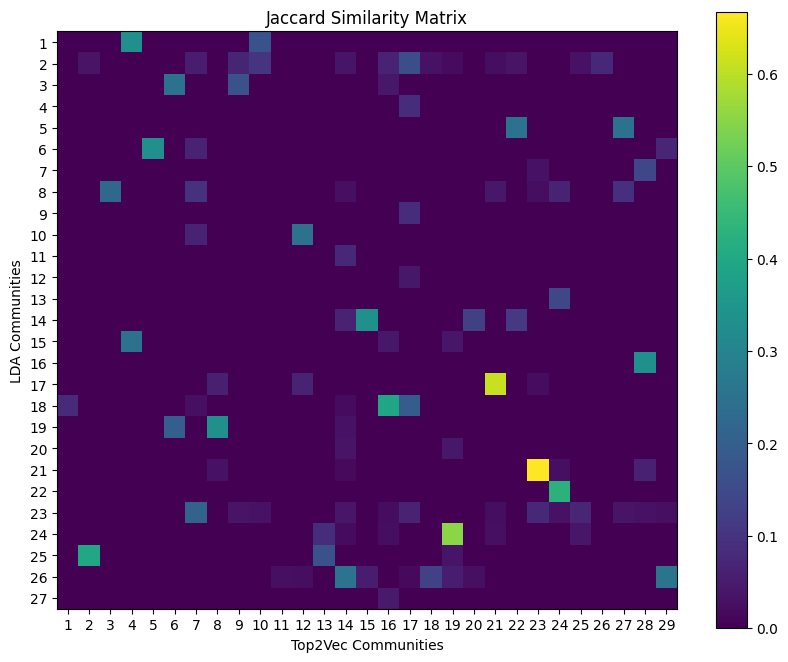

In [61]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(10,8))

# Plot the matrix
im = ax.imshow(N_confusion)

ax.set_xticks(np.arange(num_top2vec_communities))
ax.set_yticks(np.arange(num_lda_communities))
ax.set_xticklabels(np.arange(1, num_top2vec_communities+1))
ax.set_yticklabels(np.arange(1, num_lda_communities+1))

# Set the axis labels
ax.set_xlabel('Top2Vec Communities')
ax.set_ylabel('LDA Communities')

cbar = ax.figure.colorbar(im)
ax.set_title('Jaccard Similarity Matrix')

plt.show()